In [1]:
import atmosphere_bgs
import numpy as np
import matplotlib.pyplot as plt

# Getting the data

In [2]:
data = atmosphere_bgs.DataLoader("../data/bs_lc2low2001010400", nextra=7)

# Solving the problem

In [3]:
# initialize solver
solv = atmosphere_bgs.OTSolver(data, ot_tol=1e-4, boundary_res=2000)

# here you can adjust parameters as necessary
#solv.sp.min_line_resolution = 8

# run solver
solv.get_bgs(verbose=True);

it=-1, lr=1.00e-05, good_areas=2992/2992
it=0, lr=2.00e-05, good_areas=2992/2992, meanerr=1.006850e+01, l2err = 7.447927e+03, max_err=6.357863e+03
it=1, lr=4.00e-05, good_areas=2992/2992, meanerr=1.006832e+01, l2err = 7.447779e+03, max_err=6.357736e+03
it=2, lr=8.00e-05, good_areas=2992/2992, meanerr=1.006795e+01, l2err = 7.447481e+03, max_err=6.357482e+03
it=3, lr=1.60e-04, good_areas=2992/2992, meanerr=1.006719e+01, l2err = 7.446886e+03, max_err=6.356974e+03
it=4, lr=3.20e-04, good_areas=2992/2992, meanerr=1.006566e+01, l2err = 7.445696e+03, max_err=6.355958e+03
it=5, lr=6.40e-04, good_areas=2992/2992, meanerr=1.006284e+01, l2err = 7.443318e+03, max_err=6.353925e+03
it=6, lr=1.28e-03, good_areas=2992/2992, meanerr=1.005683e+01, l2err = 7.438558e+03, max_err=6.349860e+03
it=7, lr=2.56e-03, good_areas=2992/2992, meanerr=1.004525e+01, l2err = 7.429030e+03, max_err=6.341730e+03
it=8, lr=5.12e-03, good_areas=2992/2992, meanerr=1.002017e+01, l2err = 7.409955e+03, max_err=6.325473e+03
faile

# Using the builtin plot function

fixed 0 intersects
(1000, 1000)


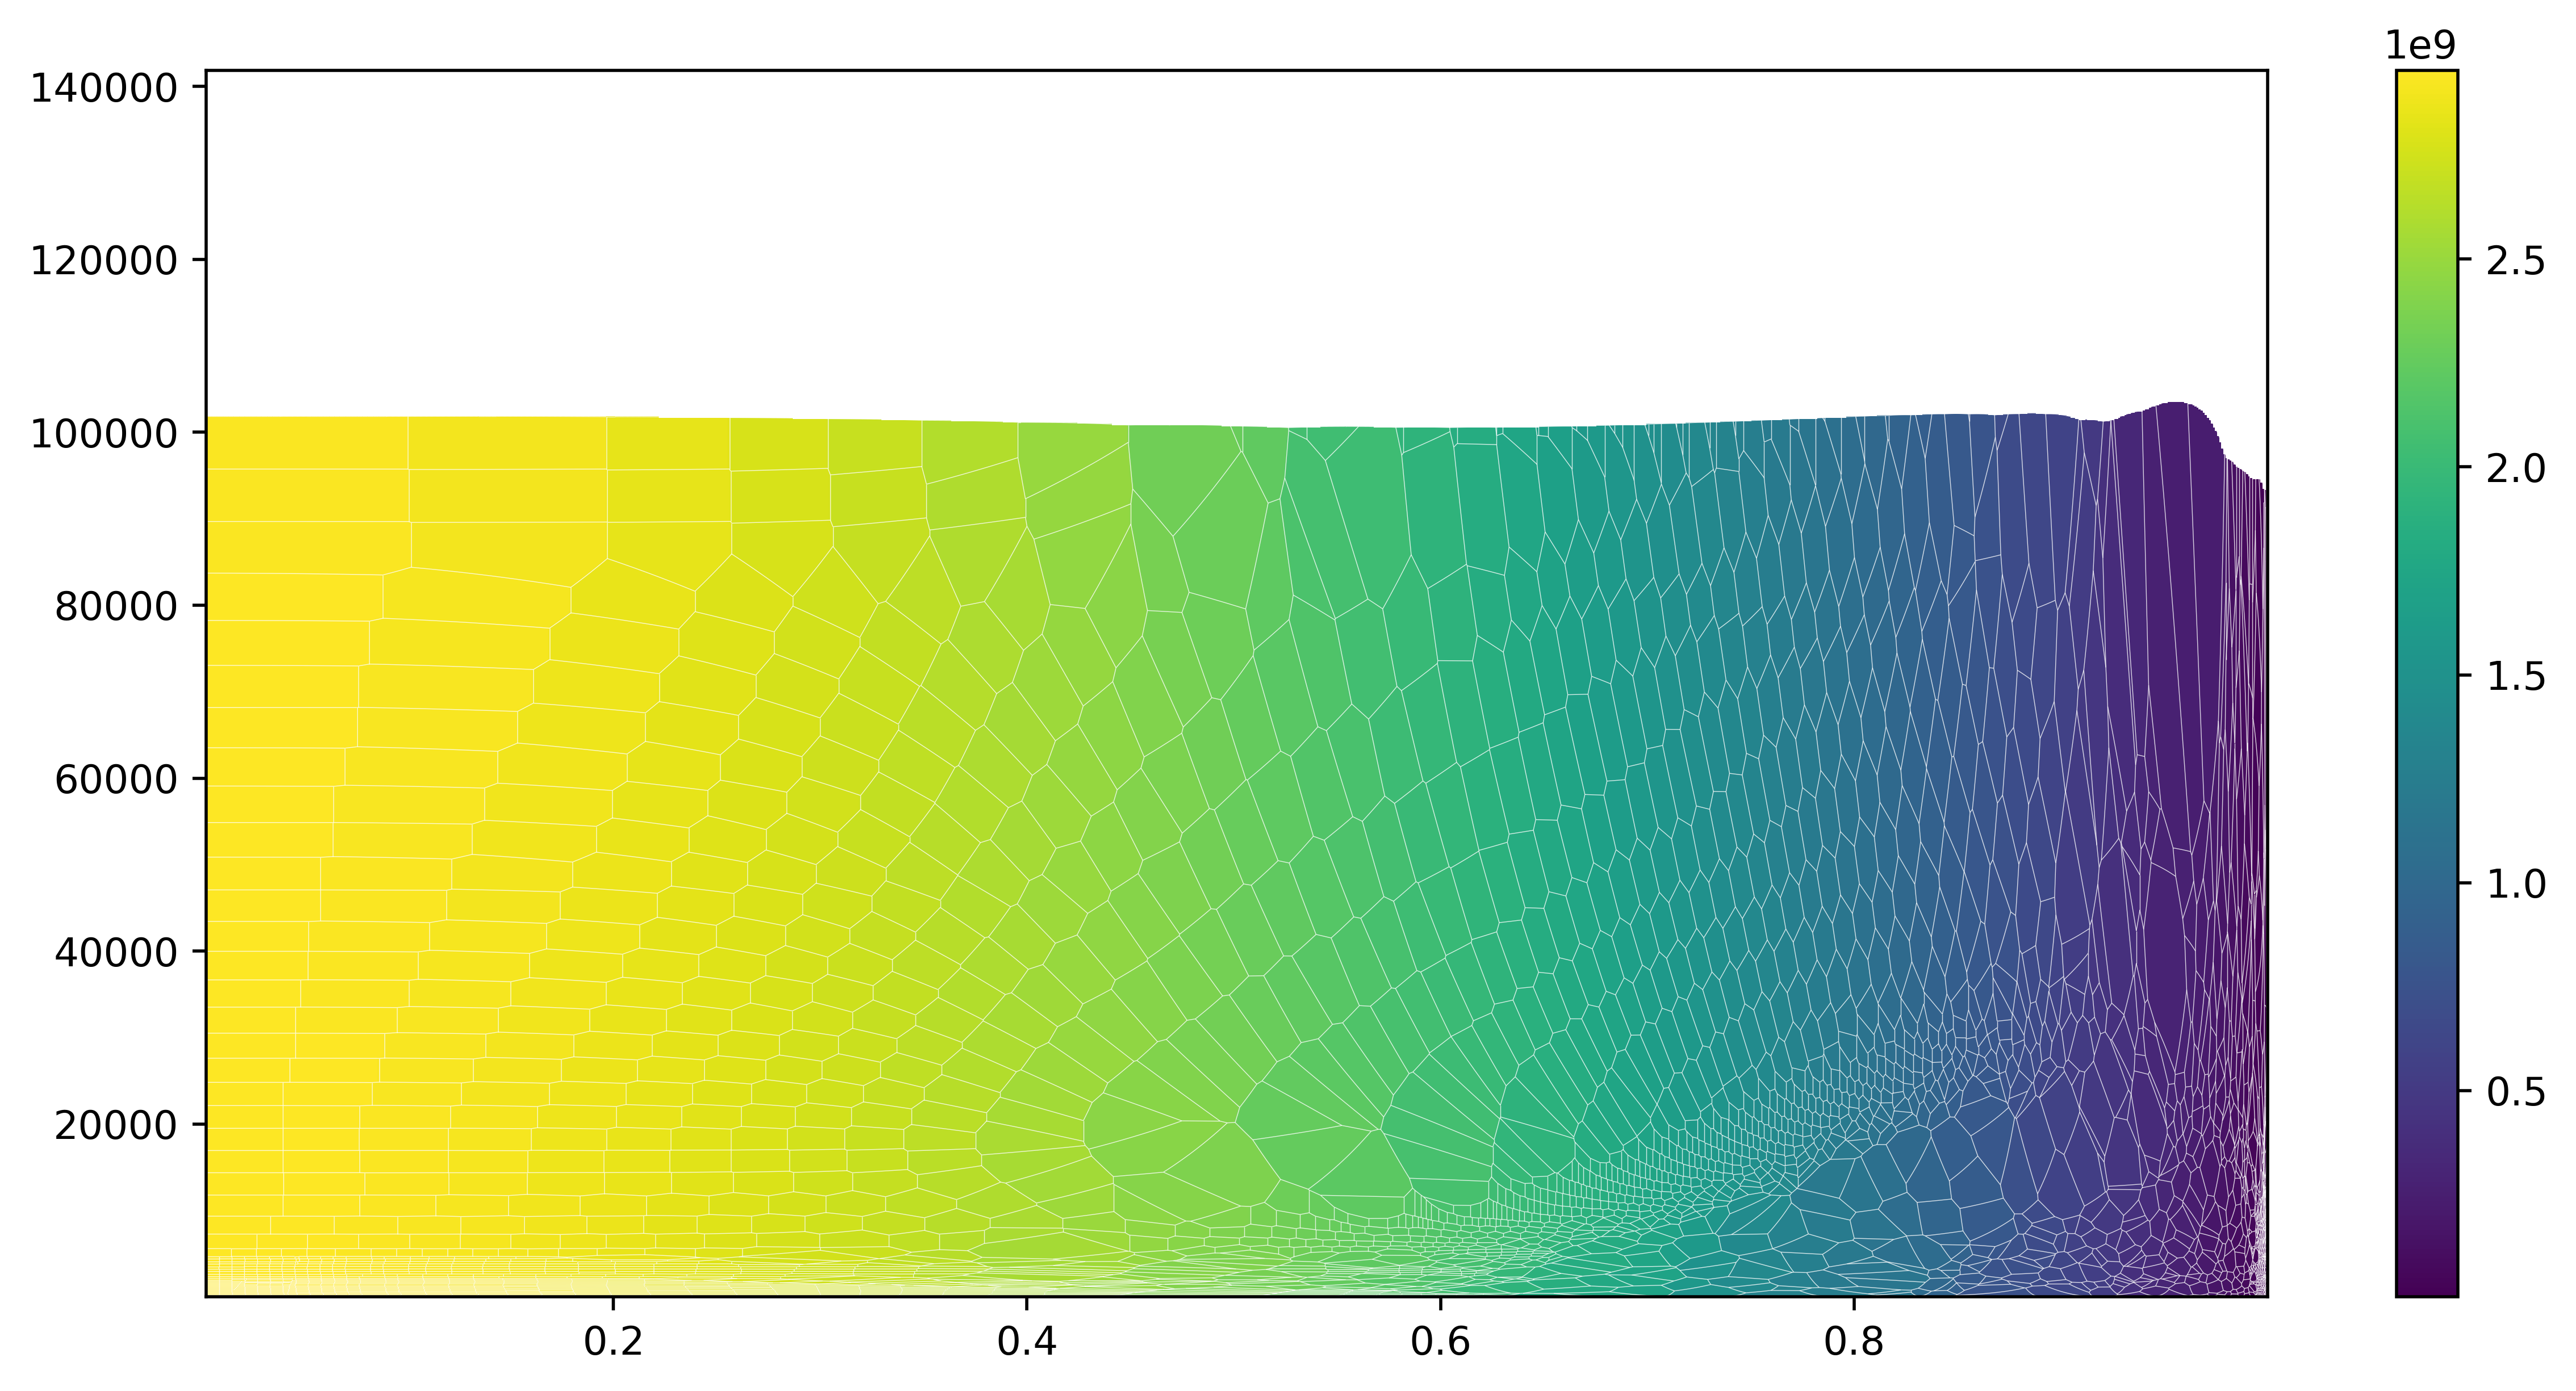

In [4]:
# calculate values to fill cells with
val = solv.y[:,0]

# use predefined plotting function (see the docstring for arguments)
rv = atmosphere_bgs.plot_lag_tess(solv.ld, val);

# the function also returns the rasterized result
print(rv[0].shape)

# Manual rasterization

fixed 0 intersects


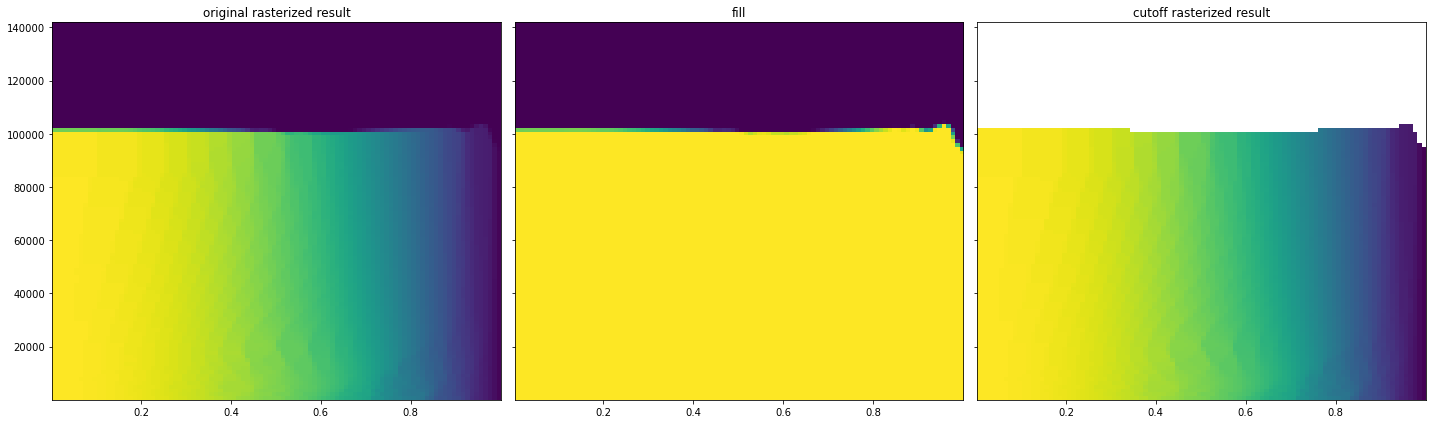

In [15]:
# to get rasterized matrix without plotting, get the rasterizer from the laguerre diagram directly
rast = solv.ld.get_rasterizer()

# get_rasterizer can optionally take a R^2 -> R^2 transformation which is applied to the diagram beforehand, e.g.
#rast = solv.ld.get_rasterizer(lambda x : [np.rad2deg(np.arcsin(x[0])), np.log10(x[1])])

# the rasterizer can be used to calculate regular-grid rasterized functions defined piecewise constant on the Laguerre cells
# the first argument to rasterize is an array of function values, the second is the desired resolution
# for pixels intersecting multiple Laguerre cells, the value is set to the linear combination weighted by the intersecting areas
a = rast.rasterize(val, (100, 100))

# you can retrieve how full each pixel is from the rasterizer (the value in each cell will be the entry of val in the index corresponding to the input seed of the cell, the top cell has index n, if the index is out ouf bounds, the cell will stay unfilled)
fill = rast.fill

# set pixels that are less than half filled to nan
b = np.where(fill > 0.5, np.divide(a, fill, where=(fill > 0)), np.nan)

# example plot
fig, axs = plt.subplots(1, 3, figsize=(20,6), sharex=True, sharey=True, tight_layout=True)

axs[0].imshow(a.T, extent=rast.bounds, aspect="auto", origin="lower")
axs[0].set_title("original rasterized result")

axs[1].imshow(fill.T, extent=rast.bounds, aspect="auto", origin="lower")
axs[1].set_title("fill")

axs[2].imshow(b.T, extent=rast.bounds, aspect="auto", origin="lower")
axs[2].set_title("cutoff rasterized result")

plt.show()